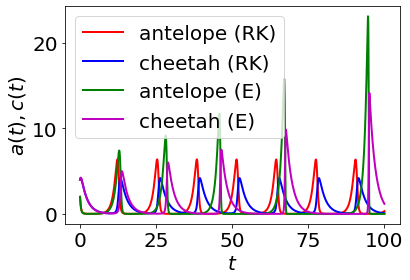

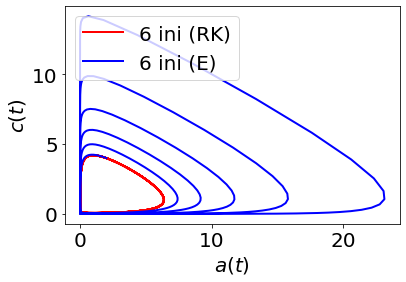

0.0011179601540876514
0.00035601631175685624
0.00010598640665514971
2.4759931715126368e-05


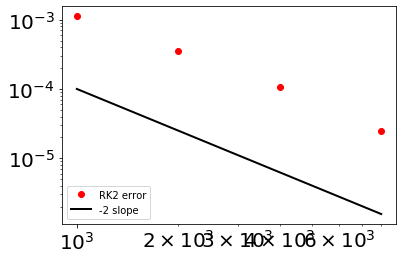

0.010258956136401804
0.0036182851562700405
0.001287294870538054
0.0004652633431428673


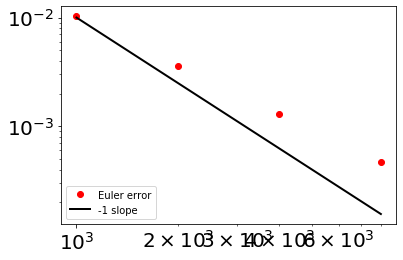

In [2]:
import numpy as np
import math
import matplotlib.pyplot as plt

class LotkaVolterra:
    """This class defines the Lotka--Voltera prey-predator
    system. There are 4 parameters in this class which 
    define the evoluion of the system.

    Attributes:
        k_a     reproduction rate of the antelopes
        k_ca    death rate of antelopes when the meet cheetahs
        k_c     death rate of cheetahs
        k_a     reproduction rate of the cheetahs when they meet antelopes
    """
    def __init__(self,k_a,k_ca,k_c,k_ac):
        self.k_a = k_a
        self.k_ca = k_ca
        self.k_c = k_c
        self.k_ac = k_ac

    def __call__(self,x,t):
        y = np.zeros(len(x))
        y[0] = self.k_a*x[0]-self.k_ca*x[0]*x[1]
        y[1] = -self.k_c*x[1]+self.k_ac*x[0]*x[1]

        return y

class Logistic:
    """This class defines the Logistic population
    growth of a population which has a limited size C
    and a growth rate of nu.

    Attributes:
        nu    Growth rate of the population
        C     Limit sizeof the population
    """
    def __init__(self,nu,C):
        self.nu = nu
        self.C = C

    def __call__(self,x,t):
        return self.nu*(1-x/self.C)*x

class ExplicitEuler:
    """This class defines the Explicit Euler 
    scheme for the numerical resolution of 
    a differentiel equation.
    """
    def __init__(self,f):
        self.f = f

    def iterate(self,x0,t,dt):
        return x0+dt*self.f(x0,t)

class RK2:
    """This class defines the Runge-Kutta 2 
    scheme for the numerical resolution of 
    a differentiel equation.
    """
    def __init__(self,f):
        self.f = f

    def iterate(self,x0,t,dt):
        return x0+dt*self.f(x0+dt/2*self.f(x0,t),t+dt/2)

class Integrator:
    """This class defines the Integration  
    of a differential equation between tMin and tMax
    with N discretization steps and x0 as an initial condition
    """
    def __init__(self,method,x0,tMin,tMax,N):
        self.x0   = x0
        self.tMin = tMin
        self.tMax = tMax
        self.dt   = (tMax - tMin)/(N-1)

        self.f = method

    def getIntegrationTime(self):
        return np.arange(self.tMin,self.tMax+self.dt,self.dt)
        

    def integrate(self):
        x = np.array([self.x0])
        for t in np.arange(self.tMin,self.tMax,self.dt):
            x = np.append( x, [self.f.iterate(x[-1,:],t,self.dt)],axis=0)
        return x

# Plots the data in a 2d plot 
def plotData(x,y,color,legend):

    plt.rc('xtick', labelsize=20)    
    plt.rc('ytick', labelsize=20)    
    plt.ylabel('$a(t),c(t)$',fontsize=20)
    plt.xlabel('$t$', fontsize=20)

    plt.plot(x,y,color,linewidth=2.0,label=legend)
    plt.legend(loc=2,prop={'size':20})


# Parametric plot of x vs y
def parametricPlotData(x,y,color,xAxis,yAxis,legend):

    plt.rc('xtick', labelsize=20)    
    plt.rc('ytick', labelsize=20)    
    plt.xlabel('$'+xAxis+'$',fontsize=20)
    plt.ylabel('$'+yAxis+'$',fontsize=20)

    plt.plot(x,y,color,linewidth=2.0,label=legend)
    plt.legend(loc=2,prop={'size':20})

# Plot the population of the antelope and the cheetah
x0 = np.array([2, 4])
tmin = 0
tmax = 100

rk2 = Integrator(RK2(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,2000)
eul = Integrator(ExplicitEuler(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,2000)

plotData(rk2.getIntegrationTime(),rk2.integrate()[:,0],'r-',"antelope (RK)")
plotData(rk2.getIntegrationTime(),rk2.integrate()[:,1],'b-',"cheetah (RK)")
plotData(eul.getIntegrationTime(),eul.integrate()[:,0],'g-',"antelope (E)")
plotData(eul.getIntegrationTime(),eul.integrate()[:,1],'m-',"cheetah (E)")

plt.show()

parametricPlotData(rk2.integrate()[:,0], rk2.integrate()[:,1],'r-','a(t)','c(t)',"6 ini (RK)")
parametricPlotData(eul.integrate()[:,0], eul.integrate()[:,1],'b-','a(t)','c(t)',"6 ini (E)")

plt.show()

# Compues the errror between 2 solutions with a given ratio 
# in term of resolution points
def computeError(x,xRef,ratio):
    iMax = np.size(xRef,axis=0)
    totError = 0
    for i in np.arange(0,np.size(xRef,axis=1)):
        totError += math.sqrt(np.sum(np.square(x[:,i]-xRef[0:iMax:ratio,i])))/np.size(x[:,i])
    
    return totError


n_rk = np.array([1000, 2000, 4000, 8000])
n_e = np.array([1000, 2000, 4000, 8000])

n_ref = 16000
tmin = 0
tmax = 13

rk2 = Integrator(RK2(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,n_ref)
solRefRK = rk2.integrate()

eul = Integrator(ExplicitEuler(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,n_ref)
solRefE = eul.integrate()


errRK = []
for i in n_rk:
	rk = Integrator(RK2(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,i)
	r_rk = n_ref//i
	errRK.append(computeError(rk.integrate(),solRefRK,r_rk))
	print(computeError(rk.integrate(),solRefRK,r_rk))

plt.loglog(n_rk,errRK,'ro',linewidth=2.0,label="RK2 error")
plt.loglog(n_rk,np.power(n_rk/10,-2),'k-',linewidth=2.0,label="-2 slope")
plt.legend(loc=3)
plt.show()

errE = []
for i in n_rk:
	e = Integrator(ExplicitEuler(LotkaVolterra(1,1,0.5,0.5)),x0,tmin,tmax,i)
	r_rk = n_ref//i
	errE.append(computeError(e.integrate(),solRefRK,r_rk))
	print(computeError(e.integrate(),solRefRK,r_rk))


plt.loglog(n_rk,errE,'ro',linewidth=2.0,label="Euler error")
plt.loglog(n_rk,np.power(n_e/100,-2),'k-',linewidth=2.0,label="-1 slope")
plt.legend(loc=3)
plt.show()
